In [3]:
import numpy as np
import pandas as pd
import math #mathematical functions

import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mode #just for mode
from scipy.special import binom #binomial distribution
from scipy.stats import iqr #only for interquartile range

from google.colab import drive
drive.mount('/content/drive')
path= "/content/drive/My Drive/Colab Notebooks/CDSS/Data Folder"
!ls "/content/drive/My Drive/Colab Notebooks/CDSS/Data Folder"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Amazon_Unlocked_Mobile.csv    exams.csv	    nightlight.csv
 Athletes_winter_games.csv     ford.csv		    OrangeJuice_quality.csv
'cars_for_sale(cleaned).csv'   friends.csv	    stroke.csv
 creditcard_numerical.csv      iris.csv		   'Wholesale customers data.csv'
 data.csv		       Mall_Customers.csv  'Womens Clothing E-Commerce Reviews.csv'


In [4]:
ford = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CDSS/Data Folder/ford.csv")
# Find the indices of rows where the year is 2060
indices_to_drop = ford[ford['year'] == 2060].index

# Drop the rows with the found indices
ford.drop(indices_to_drop, inplace=True)

In [5]:
ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [6]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17965 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


In [7]:
ford.model=ford.model.astype('category')

In [8]:
ford.transmission=ford.transmission.astype('category')

In [9]:
ford.fuelType=ford.fuelType.astype('category')

In [10]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17965 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         17965 non-null  category
 1   year          17965 non-null  int64   
 2   price         17965 non-null  int64   
 3   transmission  17965 non-null  category
 4   mileage       17965 non-null  int64   
 5   fuelType      17965 non-null  category
 6   tax           17965 non-null  int64   
 7   mpg           17965 non-null  float64 
 8   engineSize    17965 non-null  float64 
dtypes: category(3), float64(2), int64(4)
memory usage: 1.0 MB


In [11]:
ford.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.864069,12279.856833,23360.858447,113.324353,57.907821,1.350804
std,2.024978,4741.279186,19471.182902,62.010410,10.125350,0.432379
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31048.000000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [12]:
ford.describe(include='category')

,model,transmission,fuelType
count,17965,17965,17965
unique,24,3,5
top,Fiesta,Manual,Petrol
freq,6556,15518,12178


In [13]:
ford.describe(include=['float','category'])

,model,transmission,fuelType,mpg,engineSize
count,17965,17965,17965,17965.000000,17965.000000
unique,24,3,5,NaN,NaN
top,Fiesta,Manual,Petrol,NaN,NaN
freq,6556,15518,12178,NaN,NaN
mean,NaN,NaN,NaN,57.907821,1.350804
std,NaN,NaN,NaN,10.125350,0.432379
min,NaN,NaN,NaN,20.800000,0.000000
25%,NaN,NaN,NaN,52.300000,1.000000
50%,NaN,NaN,NaN,58.900000,1.200000
75%,NaN,NaN,NaN,65.700000,1.500000


In [14]:
print("The unique categories of model are:")
ford.model.unique()

The unique categories of model are:


[' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ..., ' Ranger', ' Streetka', ' Escort', ' Transit Tourneo', 'Focus']
Length: 24
Categories (24, object): [' B-MAX', ' C-MAX', ' EcoSport', ' Edge', ..., ' Tourneo Connect',
                          ' Tourneo Custom', ' Transit Tourneo', 'Focus']

In [15]:
print("The unique categories of transmission are:")
ford.transmission.unique()

The unique categories of transmission are:


['Automatic', 'Manual', 'Semi-Auto']
Categories (3, object): ['Automatic', 'Manual', 'Semi-Auto']

In [16]:
print("The unique categories of fuelType are:")
ford.fuelType.unique()

The unique categories of fuelType are:


['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other']
Categories (5, object): ['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol']

In [17]:
print("The frequency table of model are:\n")
ford.model.value_counts()

The frequency table of model are:



model
 Fiesta                   6556
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Escort                      1
 Ranger                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

In [18]:
print("The frequency table of transmission are:\n")
ford.transmission.value_counts()

The frequency table of transmission are:



transmission
Manual       15518
Automatic     1360
Semi-Auto     1087
Name: count, dtype: int64

In [19]:
print("The frequency table of fuelType are:\n")
ford.fuelType.value_counts()

The frequency table of fuelType are:



fuelType
Petrol      12178
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

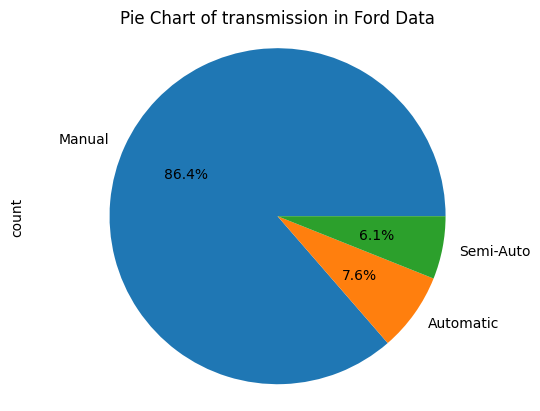

In [20]:
ford.transmission.value_counts().plot.pie(autopct='%1.1f%%',
                                     title = "Pie Chart of transmission in Ford Data")

plt.axis('equal') #applied to any piechart, and only for piechart
plt.show()

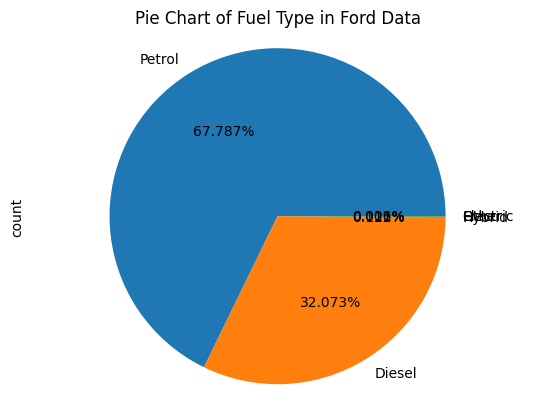

In [21]:
ford.fuelType.value_counts().plot.pie(autopct='%.3f%%',
                                     title = "Pie Chart of Fuel Type in Ford Data")

plt.axis('equal') #applied to any piechart, and only for piechart
plt.show()

<Axes: title={'center': 'Bar Chart of Fuel Type in Ford Data'}, xlabel='fuelType'>

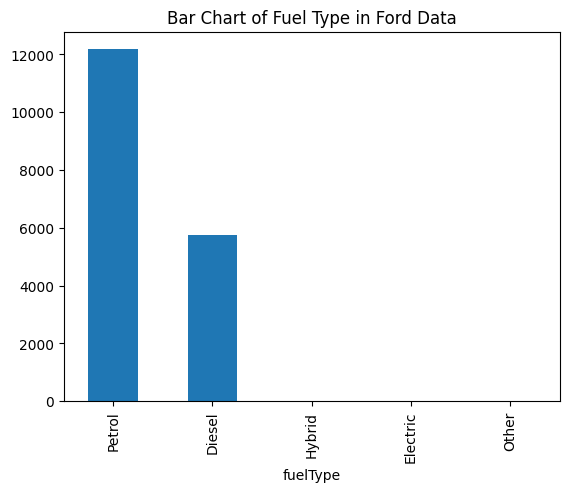

In [22]:
ford.fuelType.value_counts().plot.bar(title = "Bar Chart of Fuel Type in Ford Data")

<Axes: title={'center': 'Bar Chart of Model in Ford Data'}, xlabel='model'>

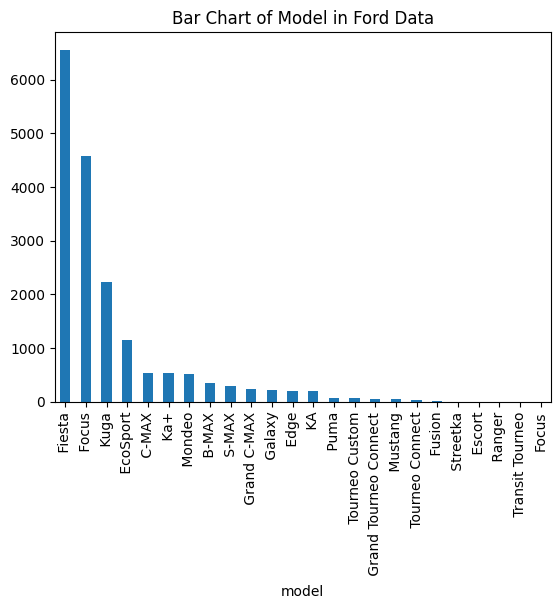

In [23]:
ford.model.value_counts().plot.bar(title = "Bar Chart of Model in Ford Data")

In [24]:
numerical_columns = ford.select_dtypes(include=['number']).columns

In [25]:
ford.mean()

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

In [ ]:
ford[['year','price','mileage','tax','mpg','engineSize']].median

In [ ]:
import pandas as pd

# Assuming df_ford is your DataFrame
# df_ford = ...

# Select only the numeric columns
numeric_ford = ford.select_dtypes(include=['number'])

# Compute the median of the numeric columns
median_values = numeric_ford.median()

print(median_values)


In [ ]:
ford[numerical_columns].median()

In [ ]:
ford[numerical_columns].mode()

In [ ]:
print(f"""
The minimum is {min(ford.price)}
The maximum is {max(ford.price)}
The first quartile is {np.quantile(ford.price,.25)}
The median is {np.median(ford.price)}
The third quartile is {np.quantile(ford.price,.75)}
The range is {max(ford.price) - min(ford.price)}
The IQR is {iqr(ford.price)}
The lower fence is {np.quantile(ford.price,.25) - 1.5 * iqr(ford.price)}
The upper fence is {np.quantile(ford.price,.75) + 1.5 * iqr(ford.price)}
""")

In [ ]:
ford[numerical_columns].var()

In [ ]:
plt.boxplot(ford.price)

In [ ]:
fg, ax = plt.subplots(ncols = 2, figsize=(12,5))

ax[0].boxplot(ford.price)
ax[0].set_title('Price')
ax[1].boxplot(ford.mileage)
ax[1].set_title('Mileage');

In [ ]:
ford.loc[  :  , 'price'].hist(bins=30)
plt.title('Histogram for Ford Price, bins = 30' )
plt.show()

In [ ]:
ford.loc[  :  , 'price'].hist(bins=100)
plt.title('Histogram for Ford Price, bins = 100' )
plt.show()

In [ ]:
fg, ax = plt.subplots(ncols = 2, figsize=(15,5))

ax[0].hist(Ford['price'],bins=30)
ax[0].set_title('histogram')

ax[1].boxplot(Ford['price'])
ax[1].set_title('boxplot');

In [ ]:
ford.boxplot(by='transmission',figsize=(15, 15));

In [ ]:
ford_tab = pd.crosstab(ford.loc[:, "fuelType"],ford.loc[:,"transmission"])

ford_tab

In [ ]:
(pd.crosstab(ford.loc[:, "fuelType"],
            ford.loc[:,"transmission"],
            normalize = "index") * 100).round(2)

In [ ]:
(pd.crosstab(ford.loc[:, "fuelType"],
            ford.loc[:,"transmission"],
            normalize = "index") * 100).round(2).plot.bar(title = "Fuel Type by Transmission");

In [ ]:
plt.scatter(x = "mileage", y = "price", data = ford)
plt.title("Mileage by Price")
plt.xlabel('Mileage')
plt.ylabel('Price');

In [ ]:
sns.pairplot(ford);

In [ ]:
ford.corr()

In [ ]:
# Heat Map of Correlations
corr_matrix = ford.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, square=False, fmt='.1g')
plt.title('Ford: Correlations between Numerical Columns');

In [ ]:
import seaborn as sns
#fordViz = sns.load_dataset(r"C:\Users\USER\OneDrive - Universiti Teknologi PETRONAS\Documents\Azami PNB GET-60\1. IDMD Main Folders\CDSS\Data Folder\ford.csv")
sns.relplot(data=ford, x="transmission", y="price", kind="line")

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ford, x='year', y='price')
plt.title('Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [ ]:
fig = px.box(ford, x='year', y='price', title='Price Distribution by Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Price')
fig.show()


In [26]:
import plotly.express as px

# Calculate average price by year
avg_price_by_year = ford.groupby('year')['price'].mean().reset_index()

fig = px.line(avg_price_by_year, x='year', y='price', title='Average Price by Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Average Price')
fig.show()
